<a href="https://colab.research.google.com/github/alfonsocude/Analitica_Datos/blob/main/07-%5BTALLER%5D_Script_basico_de_una_simulacion_en_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

Solución taller por parte de Joaquín Rodríguez y Natalia Sarmiento

### ¿Qué se debe considerar en una simulación de ML?

In [2]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-04-MACHINE-LEARNING-1/master/init.py
import init; init.init(force_download=False); 

replicating local resources


<font color='teal'>**Elementos a considerar**:</font>

- <font color=#666666>**Comprender el problema!**:</font>
- Carga de datos
- Tamaño de la base de datos
- Tipos de fuentes de información (formularios, imágenes, texto, audio, series de tiempo, etc.)
- Preprocesemanieto, segmentación, filtrado.
- Codificación de variables: 
    - Catergóricas
    - Contínuas
    - Discretas
- Limpieza, imputación.
- Estandarización de variables
- Selección/extracción de características
- Métricas de evaluación 
- Metodologías de validación: considerar tipo de problema, distribución de clases en la BD, volúmen.
- Modelos a evaluar
- Hiperparámetros de los modelos y de los algoritmos de entrenamiento.

In [3]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
%matplotlib inline

Para este ejercicio vamos a usar la **Breast cancer wisconsin (diagnostic) dataset** que puede ser descargada del UCI Machine Learning Repository [link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

In [4]:
data = load_breast_cancer()

Tamaño de la base de datos:

In [5]:
data.data.shape, data.target.shape

((569, 30), (569,))

### Responder

In [6]:
#@title Pregunta Abierta
#@markdown  ¿Cuál es el contexto del problema?
respuesta_1 = "\"Trata sobre el diagnostico de cancer de mama a partir de 30 variables explicativas\"" #@param {type:"string"}

In [7]:
#@title Pregunta Abierta
#@markdown  ¿Cuál es el problema que se debe resolver desde el punto de vista de Machine Learning?
respuesta_2 = "\"Se debe resolver un problema de clasificacion \"" #@param {type:"string"}

**Características**

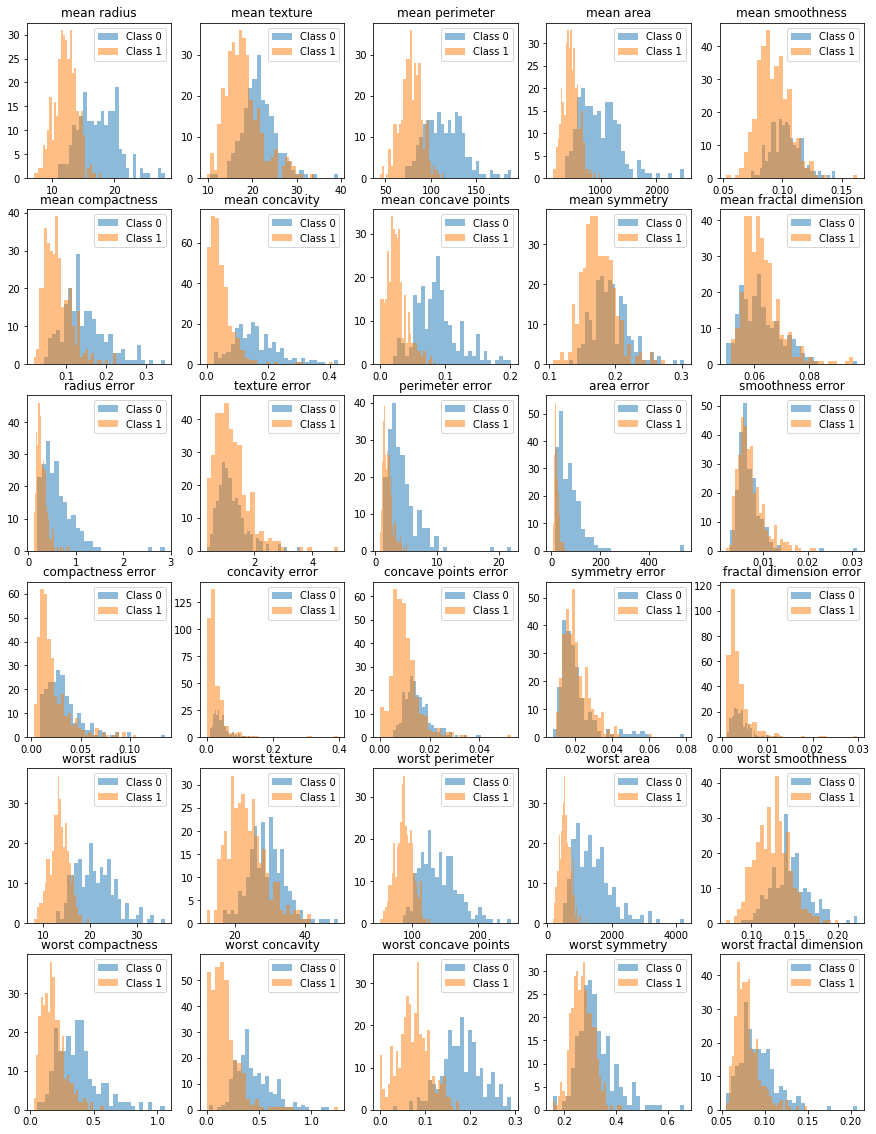

In [8]:
fig, axs = plt.subplots(6,5, figsize=(15,20))
f = 0
for i in range(6):
    for j in range(5):
        axs[i,j].hist(data.data[data.target==0,f],30,alpha=0.5, label='Class 0')
        axs[i,j].hist(data.data[data.target==1,f],30,alpha=0.5, label='Class 1')
        axs[i,j].set_title(data.feature_names[f])
        axs[i,j].legend()
        f += 1

### Metodología de Validación

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.20, random_state=42)

### Estandarización de variables

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Modelo base e hiperparámetros a evaluar

In [11]:
from sklearn.neighbors import KNeighborsClassifier

[the k-nearest neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

**¿Hiperparámetros?**

In [12]:
clf = KNeighborsClassifier(n_neighbors=3)

### Métrica de evaluación

In [13]:
from sklearn.metrics import accuracy_score

### Entrenamiento y prueba

In [14]:
#Conjunto de hiperparámetros a evaluar
grid_search = [1,3,5,7,9]

#variables para almacenar los valores de las medidas de desempeño
Train_Error = []
Test_Error = []
for i in grid_search:
    #Instanciar y entrenar el mdoelo
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    
    #Estimar las medidas de desempeño
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    Train_Error.append(accuracy_score(y_train,y_pred_train))
    Test_Error.append(accuracy_score(y_test,y_pred_test))

Train_Error = np.array(Train_Error)
Test_Error = np.array(Test_Error)

### Visualización de resultados

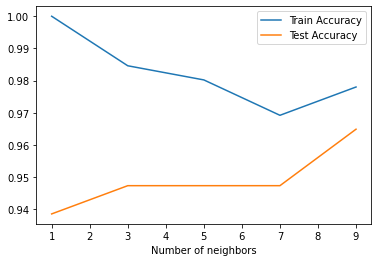

In [15]:
plt.plot(grid_search,Train_Error, label='Train Accuracy')
plt.plot(grid_search,Test_Error, label='Test Accuracy')
plt.xlabel('Number of neighbors')
plt.legend()
plt.show()

### Responder

In [16]:
#@title Pregunta Abierta
#@markdown  ¿Cuál es el mejor valor para el hiperparámetro del modelo?
respuesta_3 = "9" #@param {type:"string"}

In [17]:
#@title Pregunta Abierta
#@markdown  ¿Qué es un pipeline en Machine Learning?
respuesta_4 = "Un pipeline consiste en una serie de etapas, hay dos tipos b\xE1sicos de etapas: Transformador y estimador." #@param {type:"string"}